## State schema with DataClasses 

- when we define a Langgraph StateGraph, we use a state schema 
- The state schema represent the structure and types of data out graph will use. 
- all nodes are expected to communicate with that schema. 
- LangGraph offers Flexibility in how you define you state schema, accommodating various Python  types and validations approaches. 

>We can use the TypedDict from Python typing module.

>it allow you to specify keys and their corresponding value types. 

>But, note that these are type hints.

>they can be used by static type checker (like mypy) or IDEs to catch potential type-related error before the code in run. 

>but, **they are not enforced at runtime!** : for want specific data entry only then we must have to use the **Pydantic**

In [ ]:
from typing_extensions import TypedDict 
from typing import Literal  

class TypeDictState(TypedDict): 
    name:str    ## don't think that here if i pass number it take it. we just give it for name should be string otherwise also works
    game:Literal['cricket' , 'badminton']

In [54]:
def play_game(state:TypeDictState): 
    print('-- play game node has been called -- ') 
    return {'name':f"{state['name']} want to play {state['game']}"} 

def cricket(state:TypeDictState): 
    print('cricket node has been called') 
    return {'game':'cricket'}

def badminton(state:TypeDictState): 
    print('badminton node has been called') 
    return {'game':'badminton'}

In [55]:
import random
def decide_function(state:TypeDictState) -> Literal['cricket' , 'badminton']:  
    if random.random() > 0.5: 
        return 'cricket'
    else: 
        return 'badminton'

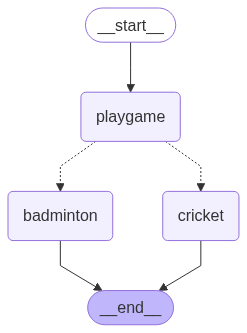

In [56]:
import random 
from IPython.display import Image, display 
from langgraph.graph import START , END , StateGraph 


builder = StateGraph(TypeDictState) 
builder.add_node('playgame' , play_game) 
builder.add_node('cricket',cricket) 
builder.add_node('badminton' , badminton) 

## flow of the graph 

builder.add_edge(START , 'playgame') 
builder.add_conditional_edges('playgame' , decide_function) 
builder.add_edge('cricket',END) 
builder.add_edge('badminton' , END)  

## ADD 
graph = builder.compile() 

display(Image(graph.get_graph().draw_mermaid_png()))

In [57]:
graph.invoke({'game':'cricket' , 'name':'rohit'})

-- play game node has been called -- 
cricket node has been called


{'name': 'rohit want to play cricket', 'game': 'cricket'}

In [ ]:
graph.invoke({'name' : 10 , 'game':'cricket'})  ## here use see even i pass number it till takes number

-- play game node has been called -- 
badminton node has been called


{'name': '10 want to play cricket', 'game': 'badminton'}

## DataClasses 
- Python dataclasses provide another way to define structure data. 
- Dataclasses offere concise syntax for creating classes that are primarily store data.

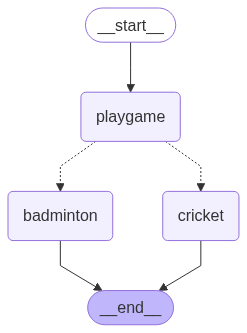

In [65]:
## dataclass 
from dataclasses import dataclass 

@dataclass  
class DataClassState: 
    name: str 
    game:Literal['cricket' , 'badminton']

def play_game(state:DataClassState): 
    print('-- play game node has been called -- ') 
    return {'name':f"{state.name} want to play {state.game}"} 

def cricket(state:DataClassState): 
    print('cricket node has been called') 
    return {'game':'cricket'}

def badminton(state:DataClassState): 
    print('badminton node has been called') 
    return {'game':'badminton'}

def decide_function(state:DataClassState) -> Literal['cricket' , 'badminton']:  
    if random.random() > 0.5: 
        return 'cricket'
    else: 
        return 'badminton'
builder = StateGraph(TypeDictState) 
builder.add_node('playgame' , play_game) 
builder.add_node('cricket',cricket) 
builder.add_node('badminton' , badminton) 

## flow of the graph 

builder.add_edge(START , 'playgame') 
builder.add_conditional_edges('playgame' , decide_function) 
builder.add_edge('cricket',END) 
builder.add_edge('badminton' , END)  

## ADD 
graph = builder.compile() 

display(Image(graph.get_graph().draw_mermaid_png()))

In [69]:
## now we do testing 

graph.invoke(DataClassState(name='Rohit' , game='badminton'))

-- play game node has been called -- 
badminton node has been called


{'name': 'Rohit want to play badminton', 'game': 'badminton'}

In [73]:
graph.invoke(DataClassState(name=10 , game='badminton'))

-- play game node has been called -- 
cricket node has been called


{'name': '10 want to play badminton', 'game': 'cricket'}

## Pydantic - The Data Validation Library

In [ ]:
from pydantic import BaseModel  , Literal

class State(BaseModel): 
    name: str 

In [83]:
## node function 

def example_node(state:State): 
    return {'name': f"Your name is {state.name}"} 

#stategraph 
builder =StateGraph(State) 
builder.add_node('example' , example_node) 

builder.add_edge(START , 'example') 
builder.add_edge('example',END) 

graph = builder.compile()

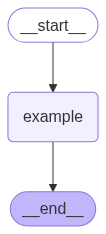

In [84]:
graph

In [85]:
graph.invoke({'name':'rohit'})

{'name': 'Your name is rohit'}

In [ ]:
graph.invoke({'name':10})  ## validation error 

ValidationError: 1 validation error for State
name
  Input should be a valid string [type=string_type, input_value=10, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type